# 아보카도 가격 예측

- 2015년부터 2018년 3월까지의 미국 전역 여러 주의 소매량과 가격을 요약하였다.
- 데이터열:
    - Date - 정보를 불러온 날짜
    - AveragePrice - 아보카도 개당 평균 가격
    - type - 유기농 유무
    - year - 년도
    - Region - 관측 도시
    - Total Volume - 아보카도 총 판매량
    - 4046 - 아보카도의 특정 단위 코드인 PLU 4046
    - 4225 - 아보카도의 특정 단위 코드인 PLU 4225
    - 4770 - 아보카도의 특정 단위 코드인 PLU 4770
- 출처: https://www.kaggle.com/datasets/neuromusic/avocado-prices

- 날짜 별로 아보카도의 가격을 보고 페이스북 prophet을 이용하여 시계열 데이터를 예측한다.

# 목차

1. 데이터 읽기
2. 데이터 시각화 및 평가
    - 박스 플롯
    - prophet

# 데이터 읽기

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
from fbprophet import Prophet

In [6]:
df = pd.read_csv('avocado.csv')
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


날짜 순으로 아보카도 가격을 표현하자.

In [7]:
df = df.sort_values("Date")
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
11569,51,2015-01-04,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.0,organic,2015,Southeast
9593,51,2015-01-04,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.0,organic,2015,Chicago
10009,51,2015-01-04,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.0,organic,2015,HarrisburgScranton
1819,51,2015-01-04,1.52,54956.80,3013.04,35456.88,1561.70,14925.18,11264.80,3660.38,0.0,conventional,2015,Pittsburgh
9333,51,2015-01-04,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.0,organic,2015,Boise


In [8]:
df.tail()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
8574,0,2018-03-25,1.36,908202.13,142681.06,463136.28,174975.75,127409.04,103579.41,22467.04,1362.59,conventional,2018,Chicago
9018,0,2018-03-25,0.70,9010588.32,3999735.71,966589.50,30130.82,4014132.29,3398569.92,546409.74,69152.63,conventional,2018,SouthCentral
18141,0,2018-03-25,1.42,163496.70,29253.30,5080.04,0.00,129163.36,109052.26,20111.10,0.00,organic,2018,SouthCentral
17673,0,2018-03-25,1.70,190257.38,29644.09,70982.10,0.00,89631.19,89424.11,207.08,0.00,organic,2018,California
8814,0,2018-03-25,1.34,1774776.77,63905.98,908653.71,843.45,801373.63,774634.09,23833.93,2905.61,conventional,2018,NewYork


2018년 3월 25일이 가장 최근 판매일인것을 확인할 수 있다.

# 데이터 시각화

상자그림을 통해 아보카도 가격의 분포를 알아보자.

<AxesSubplot:xlabel='AveragePrice'>

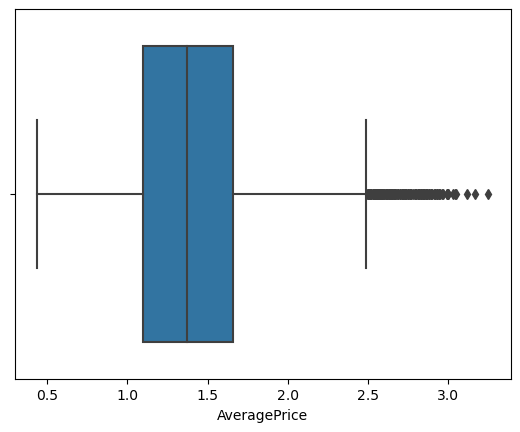

In [9]:
sns.boxplot(x = df["AveragePrice"])

Text(0.5, 1.0, 'The boxplot of the region')

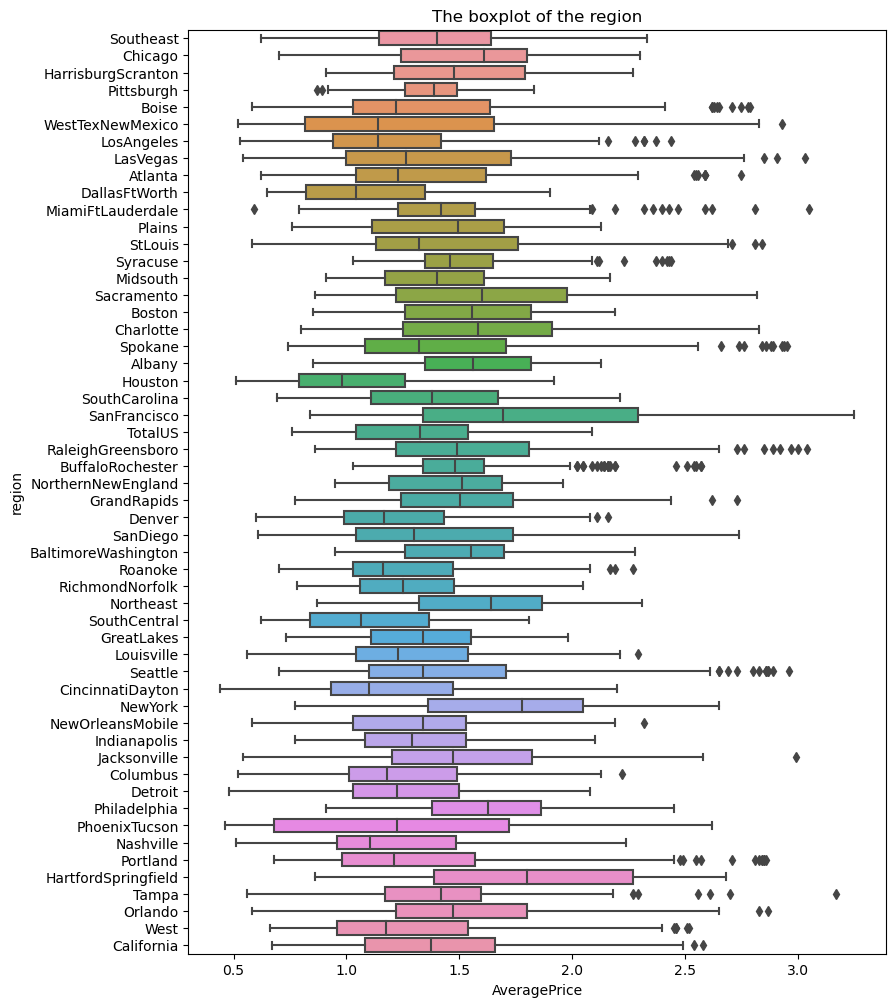

In [10]:
plt.figure(figsize = (9, 12))
sns.boxplot(y = 'region', x = 'AveragePrice', data = df)
plt.title('The boxplot of the region')

### prophet을 이용하여 데이터 예측하기

In [15]:
prophet_df = df[['Date', 'AveragePrice']] 
prophet_df = prophet_df.rename(columns={'Date':'ds', 'AveragePrice':'y'})

In [16]:
m = Prophet()
m.fit(prophet_df)
future = m.make_future_dataframe(periods=365) # 365일 뒤까지 예측
forecast = m.predict(future)

forecast.head()

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-04,1.496718,0.906476,1.875035,1.496718,1.496718,-0.112798,-0.112798,-0.112798,-0.112798,-0.112798,-0.112798,0.0,0.0,0.0,1.383920
1,2015-01-11,1.491718,0.894082,1.875936,1.491718,1.491718,-0.104291,-0.104291,-0.104291,-0.104291,-0.104291,-0.104291,0.0,0.0,0.0,1.387427
2,2015-01-18,1.486719,0.886184,1.862188,1.486719,1.486719,-0.103991,-0.103991,-0.103991,-0.103991,-0.103991,-0.103991,0.0,0.0,0.0,1.382728
3,2015-01-25,1.481720,0.871622,1.836666,1.481720,1.481720,-0.123042,-0.123042,-0.123042,-0.123042,-0.123042,-0.123042,0.0,0.0,0.0,1.358678
4,2015-02-01,1.476721,0.854192,1.811365,1.476721,1.476721,-0.151522,-0.151522,-0.151522,-0.151522,-0.151522,-0.151522,0.0,0.0,0.0,1.325199


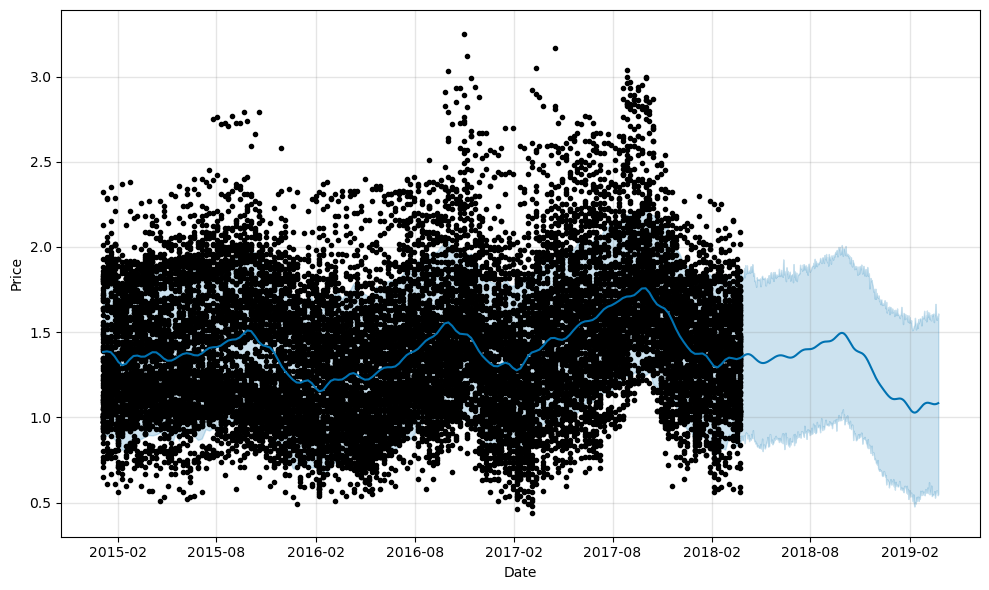

In [17]:
figure = m.plot(forecast, xlabel='Date', ylabel='Price')

- 검정점: 데이터 포인트
- 파랑선: 추세선

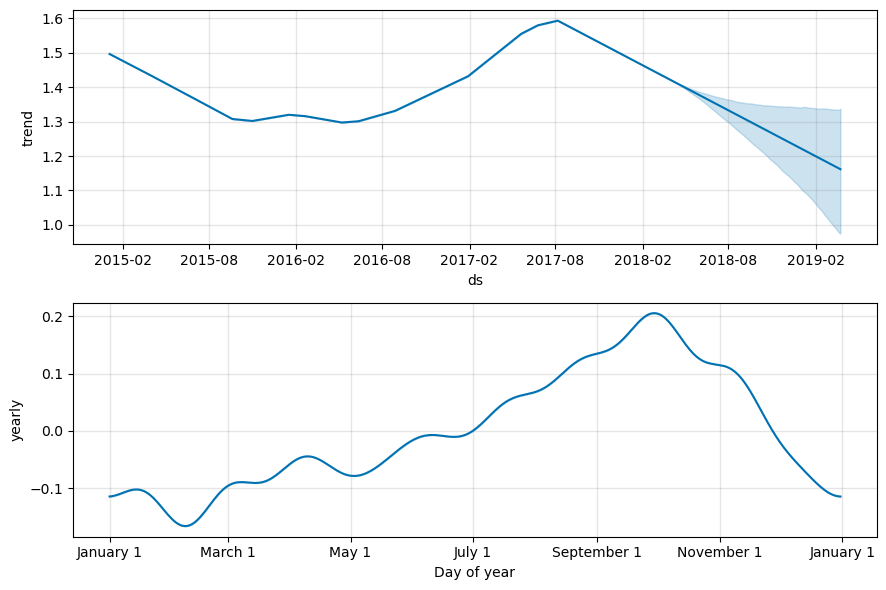

In [18]:
figure3 = m.plot_components(forecast)

1월에 가격이 감소하다가 10월에 정점을 찍는 것을 볼 수 있다.

### 특정 지역의 데이터 예측하기

In [19]:
df = pd.read_csv('avocado.csv')
df2 = df[df['region']=='California']
df2 = df2.sort_values("Date")

In [21]:
df2= df2.rename(columns={'Date':'ds', 'AveragePrice':'y'})
m = Prophet()
m.fit(df2)
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


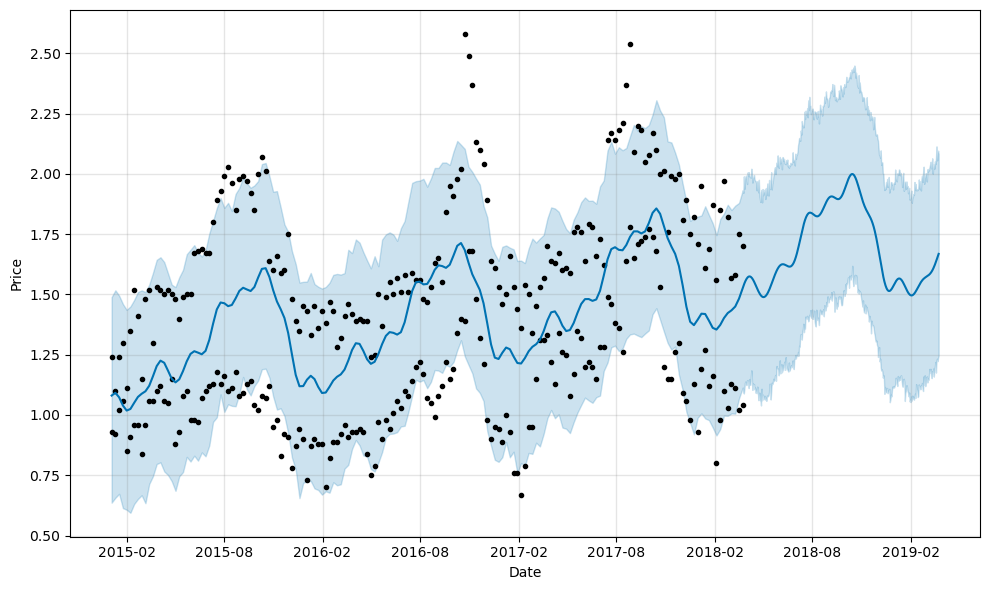

In [22]:
figure = m.plot(forecast, xlabel='Date', ylabel='Price')

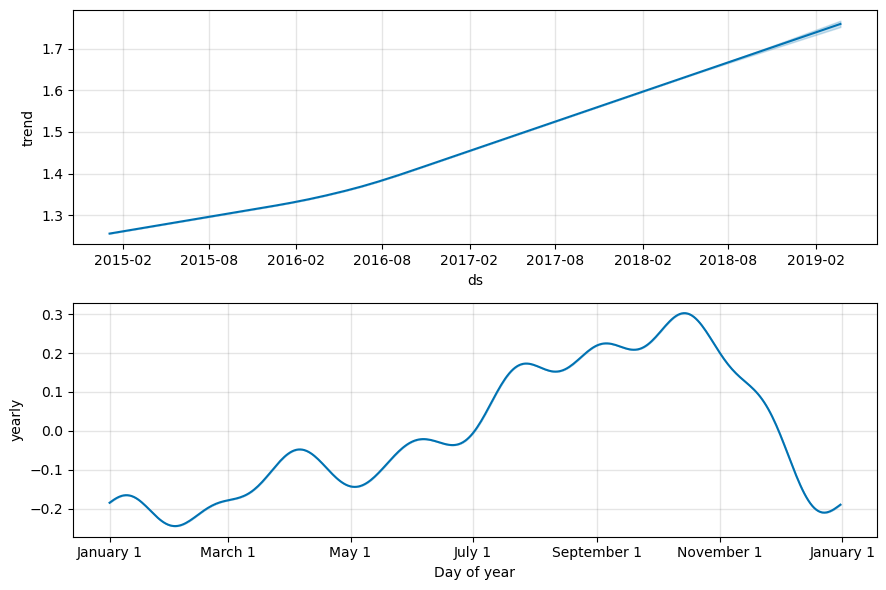

In [23]:
figure3 = m.plot_components(forecast)